In [1]:
# changing cwd
%cd ..

c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp


## Load packages

In [2]:
from src.inductive_bias import IB
ib = IB() #instantiate inductive bias package

## Time and Date of the experiment

In [3]:
print(ib.date)

2021-04-02 03:42:45.829393


## Load previously generated simulation datasets

In [4]:
ib.load_dataset()

[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\SimulationData.pickle ] loaded


## Train ML models on the simulation datasets
``Best accuracy value`` is the accuracy for training set.
``Prediction score`` is the accuracy for testing set.

Trained models = `['SVM', 'MLP', 'RF', 'QDA']` <br>
Simulation datasets = `['Gaussian XOR', 'Uniform XOR', 'Spiral', 'Gaussian R-XOR', 'Gaussian S-XOR']`

In [5]:
# ib.get_clf()

## Save current ML models trained on the simulation datasets

In [6]:
# ib.load_clf(save=True)

## Load previously trained classifiers

In [7]:
ib.load_clf()

[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\TrainedCLF.pickle ] loaded


## Predict posterior probability of each sklearn classifier (calls `predict_proba()`)

In [8]:
# ib.get_proba()

## Save current posterior probability

In [9]:
# ib.load_est(save=True)

## Load previously saved posterior probability of the trained sklearn classifiers

In [10]:
ib.load_est()

[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\EstimatedData.pickle ] loaded


## Visualization of estimated posterior probability

In [11]:
import matplotlib.pyplot as plt
from src.dataset_generator import DatasetGenerator as DG

## Load grid coordinates for plotting

In [12]:
mask = DG.generate_mask()

## Trained using 5 simulation datasets at N=100

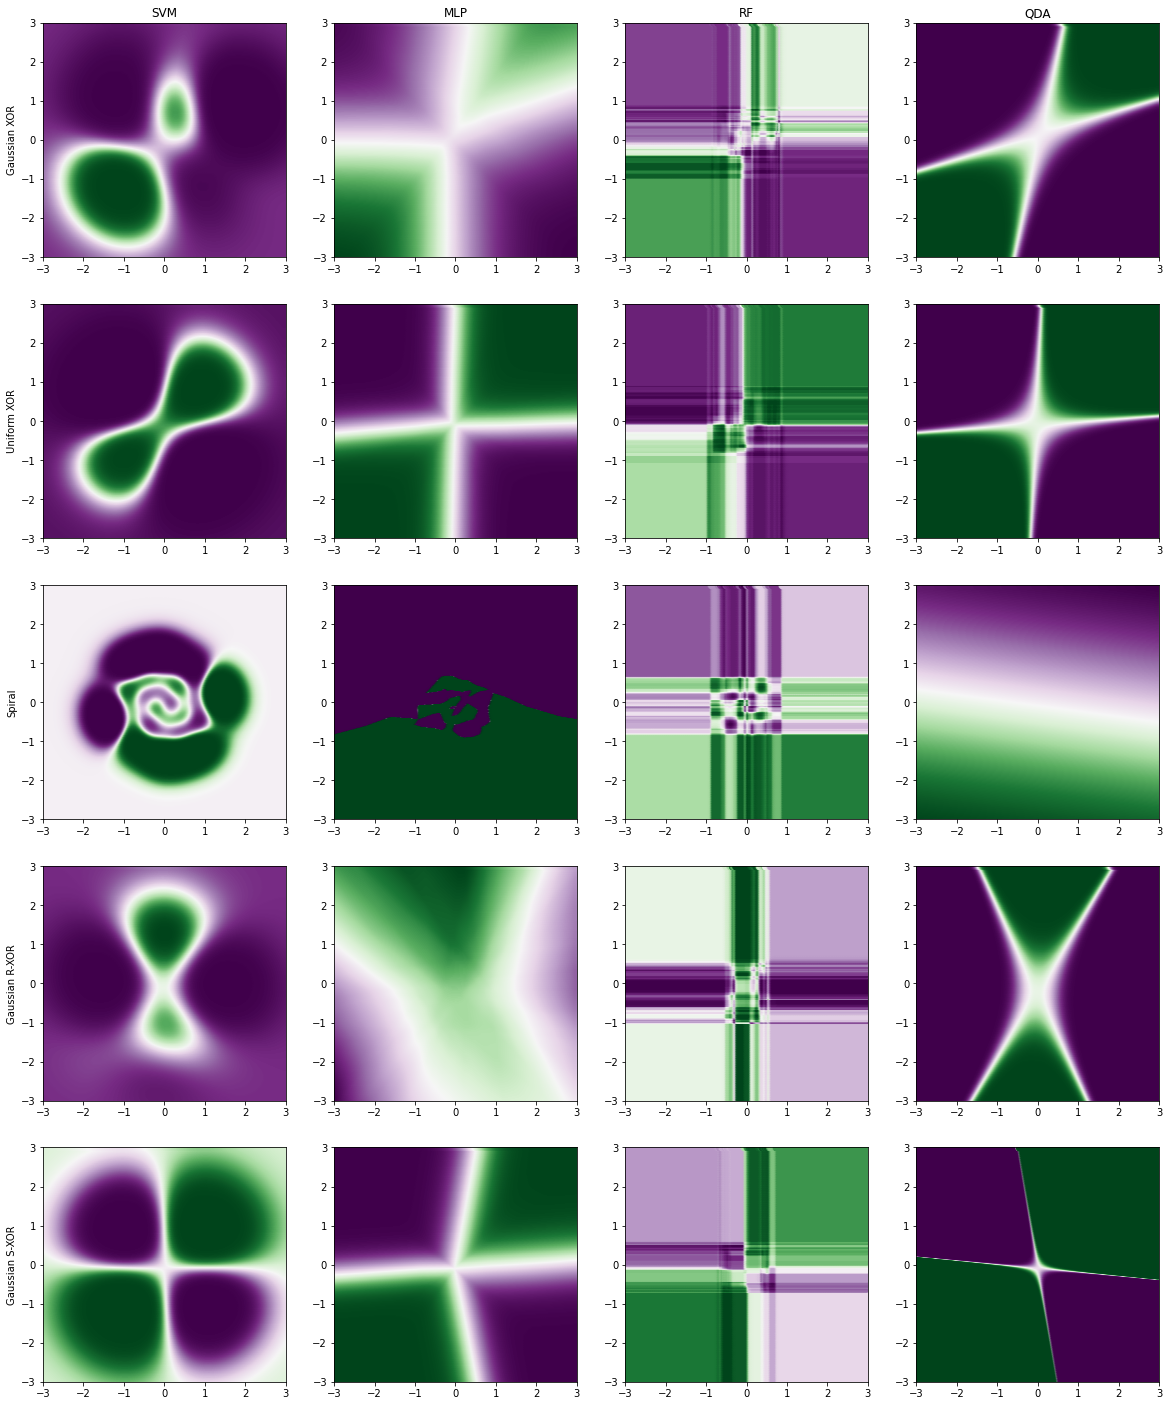

In [13]:
fig, axs = plt.subplots(5,4, figsize=(5*4, 5*5))
for j in range(5):
    for i in range(4):
        if j == 0:
            axs[j][i].set_title(ib.mtype[i])
        if i == 0:
            axs[j][i].set_ylabel(ib.dtype[j])

        axs[j][i].scatter(x=mask[:,0], y=mask[:,1],c=ib.estpst[0][j][i][:,0], cmap='PRGn')
        axs[j][i].set_xlim([-3,3])
        axs[j][i].set_ylim([-3,3])

plt.savefig(f'figs/[model_training]_probafig_{str(ib.date.date())}.png', bbox_inches='tight')